<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/DistribuicaoNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuição Normal

A distribuição normal (ou Gaussiana) é simétrica e tem formato de sino. A distribuição normal é descrita por dois parâmetros principais:

- Média (𝜇): Define o centro da distribuição.
- Desvio padrão (𝜎): Define o espalhamento dos dados ao redor da média.

A função densidade de probabilidade (PDF) da distribuição normal é dada por:

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$






Vamos criar uma população de 100.000 elementos que segue uma distribuição normal.

In [1]:
#importacoes nescessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Configurando a semente aleatória para reprodutibilidade
np.random.seed(42)

In [3]:
# Parâmetros da distribuição normal
mu = 50.00  # Média
sigma = 10.00  # Desvio padrão

In [4]:
# Geração da população com distribuição normal
population = np.random.normal(loc=mu, scale=sigma, size=100000)

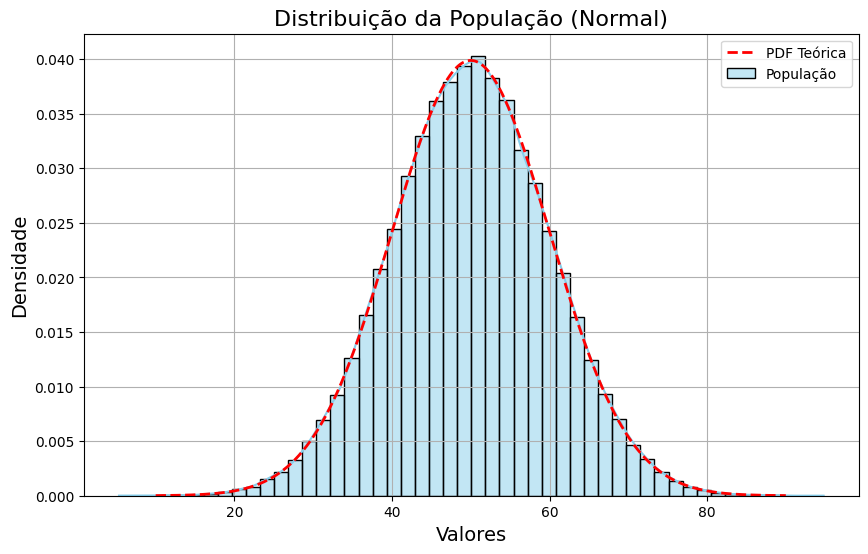

In [7]:
# Plotando a distribuição da população
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=50, kde=True, color="skyblue", stat="density", label="População")
plt.title("Distribuição da População (Normal)", fontsize=16)
plt.xlabel("Valores", fontsize=14)
plt.ylabel("Densidade", fontsize=14)

# Adicionando a PDF teórica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color="red", linestyle="dashed", linewidth=2, label="PDF Teórica")

plt.legend()
plt.grid(True)
plt.show()

No codigo:
1. Criamos uma população de 100.000 valores com a distribuição normal (𝜇 =50.00, 𝜎 =10.00).
2. Plotamos o histograma da população.
3. Sobrepomos a PDF teórica da distribuição normal (em vermelho).

# Realizando Amostragem com Diferentes Tamanhos de Amostra

Amostragens aleatórias dessa população para observar o comportamento da média das amostras, utilizando o Teorema Central do Limite (TCL).

In [15]:
# Função para visualizar a distribuição das médias amostrais
def sample_means_analysis(sample_sizes, n_samples=1000):
    plt.figure(figsize=(15, 10))
    for i, n in enumerate(sample_sizes, 1):
        # Calculando as médias amostrais
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(n_samples)]

        # Subplot para cada tamanho de amostra
        plt.subplot(2, len(sample_sizes)//2, i)
        sns.histplot(sample_means, bins=30, kde=True, color="orange", stat="density", label=f"N = {n}")

        # Adicionando a curva da distribuição normal teórica das médias
        sigma_mean = sigma / np.sqrt(n)
        x = np.linspace(mu - 4*sigma_mean, mu + 4*sigma_mean, 100)
        plt.plot(x, norm.pdf(x, mu, sigma_mean), color='red', linestyle='dashed', linewidth=2, label="Teórica")

        plt.title(f"Tamanho da Amostra = {n}")
        plt.xlabel("Média Amostral")
        plt.ylabel("Densidade")
        plt.legend()

    plt.tight_layout()
    plt.show()


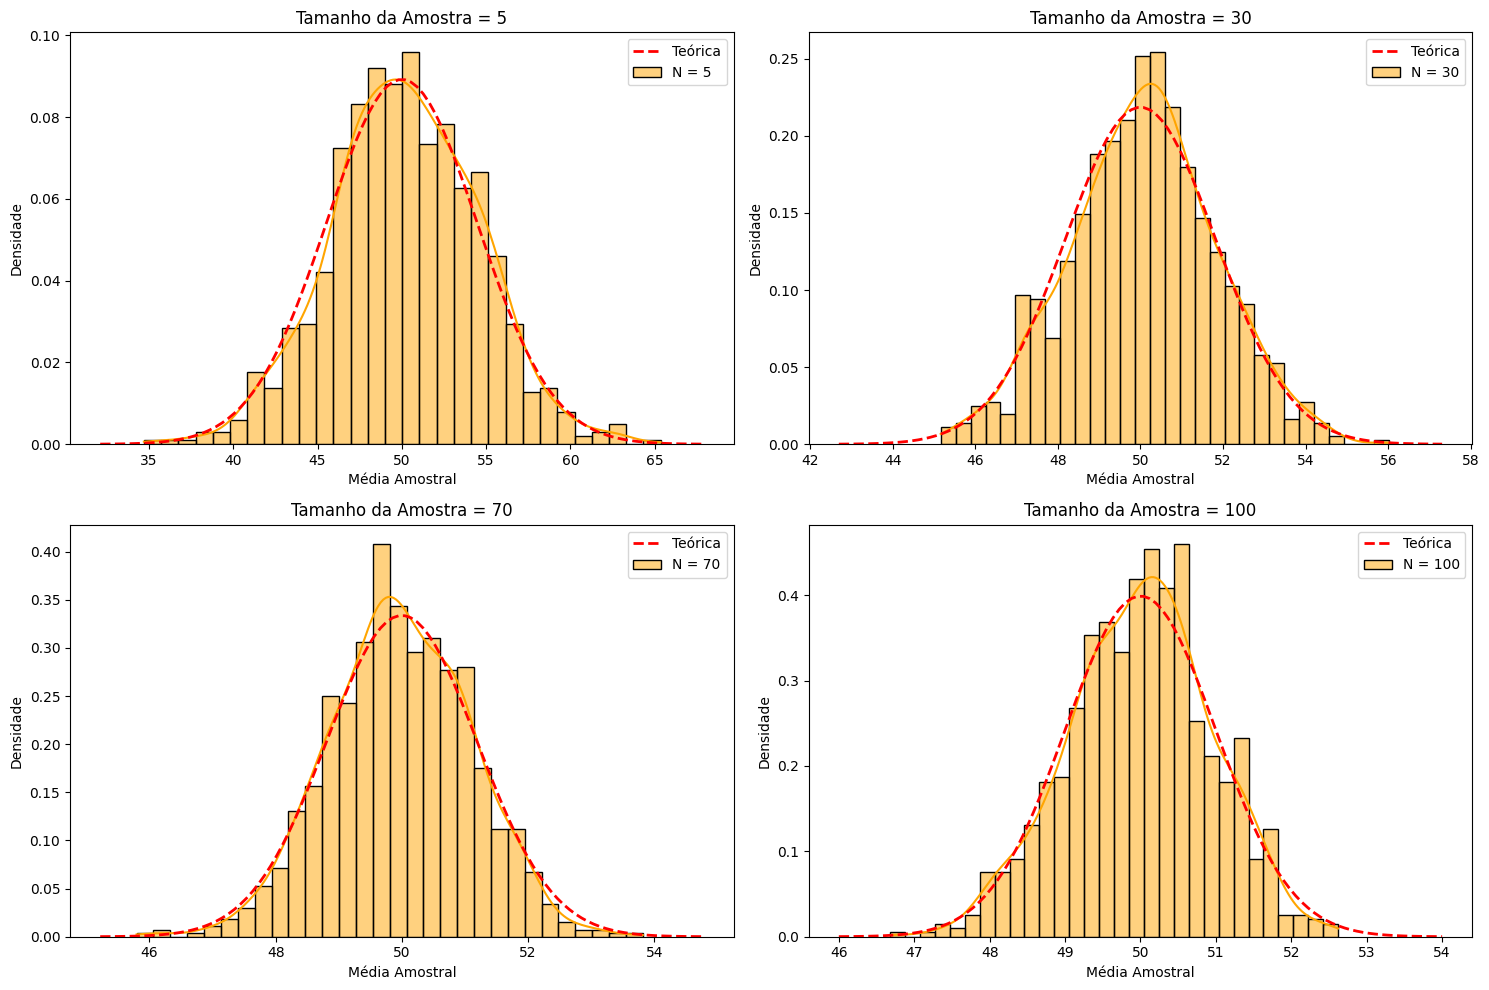

In [16]:
# Chamando a função para diferentes tamanhos de amostra
sample_sizes = [5, 30, 70, 100]
sample_means_analysis(sample_sizes)